In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data/tcr-0524-141845.csv")

In [4]:
df

,timestamp,trajectory_command__traj__x,trajectory_command__traj__y,trajectory_command__traj__vel,trajectory_command__traj__accel,trajectory_command__traj__degrees,trajectory_command__traj__time,trajectory_command__hc_vy,trajectory_command__hc_vx,trajectory_command__hc_omega,drivesubsystem__odometry_x,drivesubsystem__odometry_y,drivesubsystem__gyro_rotation2d__deg_,drivesubsystem__odometry_rotation2d__deg_,talonfx_10__closed_loop_setpoint__pid_0_,talonfx_11__closed_loop_setpoint__pid_0_,talonfx_12__closed_loop_setpoint__pid_0_,talonfx_13__closed_loop_setpoint__pid_0_
0,43,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.044393,-0.190659,0.021380,0.000006,-1.225415e-08,0.096,0.049999,0.0,0.0,0.0,0.0
1,48,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.044393,-0.190659,0.021380,0.000006,-1.225415e-08,0.096,0.049999,0.0,0.0,0.0,0.0
2,53,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.044393,-0.190659,0.021380,0.000006,-1.225415e-08,0.096,0.049999,0.0,0.0,0.0,0.0
3,58,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.044393,-0.190659,0.021380,0.000006,-1.225415e-08,0.096,0.049999,0.0,0.0,0.0,0.0
4,63,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.044393,-0.190659,0.021380,0.000006,-1.225415e-08,0.096,0.049999,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7858,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.071040,-0.181951,0.024871,3.024295,1.984055e-02,0.176,0.039999,0.0,0.0,0.0,0.0
1564,7863,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.071040,-0.181951,0.024871,3.024295,1.984055e-02,0.176,0.039999,0.0,0.0,0.0,0.0
1565,7868,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.071040,-0.181951,0.024871,3.024295,1.984055e-02,0.176,0.039999,0.0,0.0,0.0,0.0
1566,7873,3.0,0.0,0.0,-4.0,-1.124496e-14,4.498244,-0.071040,-0.181951,0.024871,3.024295,1.984055e-02,0.176,0.039999,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='drivesubsystem__odometry_x'>

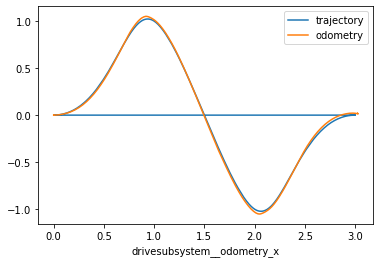

In [18]:
start = df[df['trajectory_command__traj__accel'] > 0.0].iloc[0, 0]
interval = (df['timestamp'] > start-100) & (df['timestamp'] < 6468+100)
ax = df[interval].plot(x="trajectory_command__traj__x", y="trajectory_command__traj__y", label="trajectory")
df.plot(x="drivesubsystem__odometry_x", y="drivesubsystem__odometry_y", label="odometry", ax=ax)

<AxesSubplot:xlabel='timestamp'>

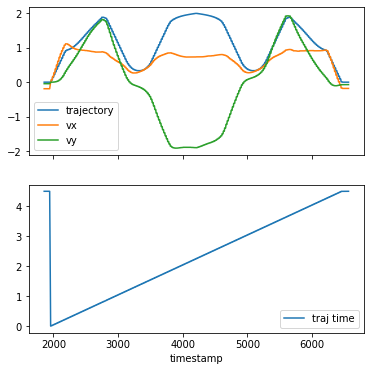

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
df[interval].plot(x="timestamp", y="trajectory_command__traj__vel", label="trajectory", ax=ax1)
df[interval].plot(
    x="timestamp",
    y="trajectory_command__hc_vx",
    label="vx",
    ax=ax1,
)
df[interval].plot(
    x="timestamp",
    y="trajectory_command__hc_vy",
    label="vy",
    ax=ax1,
)
df[interval].plot(x='timestamp', y='trajectory_command__traj__time', label='traj time', ax=ax2)

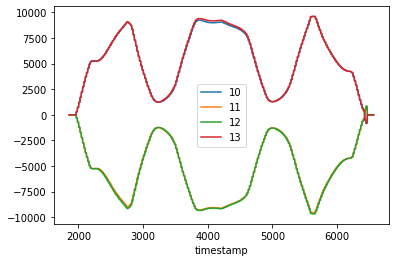

In [20]:
ax = df[interval].plot(x="timestamp", y="talonfx_10__closed_loop_setpoint__pid_0_", label="10")
ax = df[interval].plot(
    x="timestamp", y="talonfx_11__closed_loop_setpoint__pid_0_", label="11", ax=ax
)
ax = df[interval].plot(
    x="timestamp", y="talonfx_12__closed_loop_setpoint__pid_0_", label="12", ax=ax
)
ax = df[interval].plot(
    x="timestamp", y="talonfx_13__closed_loop_setpoint__pid_0_", label="13", ax=ax
)

count    1567.000000
mean        5.000000
std         0.342778
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: timestamp, dtype: float64


<AxesSubplot:ylabel='Frequency'>

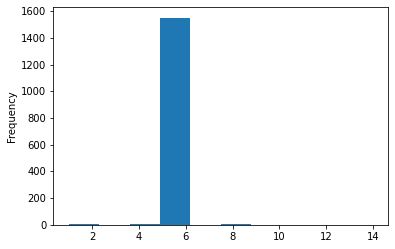

In [12]:
print(df['timestamp'].diff().describe())
df['timestamp'].diff().plot.hist(bins=10)